In [1]:

%matplotlib widget
%load_ext autoreload
%autoreload 2

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
import json
from amftrack.util.sys import storage_path
from amftrack.util.sys import temp_path
from amftrack.pipeline.development.high_mag_videos.high_mag_videos_fun import *
import pandas as pd
from PIL import Image
from scipy import signal
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray


images_path = r"E:/AMOLF_Data/Plate_videos/20221109_Plate462_04"
# images_path = r"/mnt/sun/home-folder/cargill/20221109_Plate462/20221109_Plate462_006"
fps = 20
time_pixel_size = 1/fps #s.pixel
binning = 2
magnification = 50
space_pixel_size = 2*1.725/(magnification)*binning #um.pixel
video_name = images_path.split('/')[-1]
kymos_path = '/'.join(images_path.split('/')[:-1]+["_".join((video_name,'kymos'))])
if not os.path.exists(kymos_path):
    os.mkdir(kymos_path)
files = os.listdir(images_path)

edge_kymos = glob.glob(kymos_path + '/*kymo.png')

C:\GitHub_Projects\AMOLF\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


-7
-17
-16


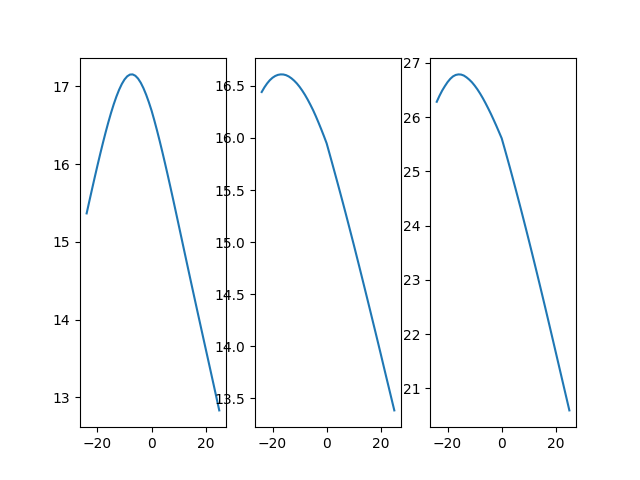

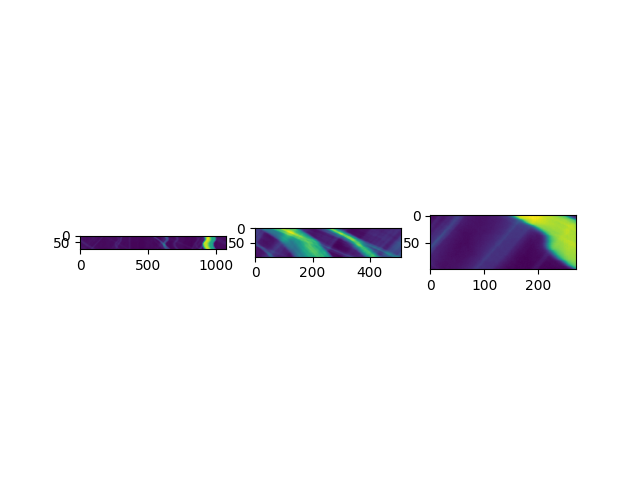

In [8]:
fig, ax = plt.subplots(1, len(edge_kymos))
fig2, ax2 = plt.subplots(1, len(edge_kymos))

for i, kymo in enumerate(ax):
    im = cv.imread(edge_kymos[i], cv.IMREAD_GRAYSCALE)[:][0:100]
    kymo.imshow(im)
#     hist_ints, hist_bins = np.histogram(im.flatten(), bins=32, range=(0, 255))
#     for j, vals in enumerate(hist_ints):
#         if vals > 100:
#             backgr_inty = hist_bins[i+1]
#             break
    
#     peaks=[signal.find_peaks(line, distance=40, height = backgr_inty) for line in im]
#     for j in range(0, np.shape(im)[0], 5):
#         kymo.scatter(peaks[j][0], [j for k in range(len(peaks[j][0]))], s=0.5)
    corr = signal.correlate(im[:][0]/255, im[:][10]/255)
    lags = signal.correlation_lags(len(im[:][0]), len(im[:][0]))
    lag_range = 25
    lag_l, lag_r = (len(im[:][0]) -lag_range, len(im[:][0]) +lag_range)
#     kymo.plot(im[:][0])
#     kymo.plot(im[:][1])
    ax2[i].plot(lags[lag_l:lag_r], corr[lag_l:lag_r])
    print(lags[np.argmax(corr)])
#     kymo.plot(im[0])
plt.show()
